# 환경 설정
matplotlib 임포트할 때 계속 오류가 나서 재설치 했습니다

In [6]:
!pip uninstall -y matplotlib

In [7]:
! pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)


In [8]:
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
# import shutil
# shutil.rmtree('./added_flowers_img')
# print(os.path.exists("./added_flowers_img"))

# 데이터 로드

- 후보 바뀌기 전 데이터라 교체해야되긴하는데 일단 코드 잘 동작하나 확인용으로 가져왔습니다.
- 6.14 작업 내용 
  - 데이터 후보 30개 정해진걸로 교체
  - 압축 해제하면 파일 이름 깨지는 경우 확인
  - Unknown image file format. One of JPEG, PNG, GIF, BMP required. 오류 확인 -> webp가 중간에 껴있는 경우가 있는데 그거 때문인거 같음
  - webp 같은 지원하지 않는 파일 직접 찾아서 지움

In [10]:
from zipfile import ZipFile
test_file_name = "./data/added_flowers_img.zip"

# 폴더 이름이 ░ó╜├║╫▓╔ 이런식으로 깨져서 디코딩 옵션 추가

with ZipFile(test_file_name, 'r') as zip:
#     zip.printdir()
#     zip.extractall() 
    zipInfo = zip.infolist()
    for member in zipInfo:
        try:
            print(member.filename.encode('cp437').decode('euc-kr', 'ignore'))
            member.filename = member.filename.encode('cp437').decode('euc-kr', 'ignore')
            zip.extract(member)
        except:
            print(member)
            raise Exception('what?!')

added_flowers_img/
added_flowers_img/각시붓꽃/
added_flowers_img/각시붓꽃/각시붓꽃 1.bimgvp0000004997.jpg
added_flowers_img/각시붓꽃/각시붓꽃 10.0q.25796104.1.jpg
added_flowers_img/각시붓꽃/각시붓꽃 100.bimgvp0000002138.jpg
added_flowers_img/각시붓꽃/각시붓꽃 101.3232235521_ndwfkqbl_2912da0a76225c5025ec15531f453db40a920cd9.jpg
added_flowers_img/각시붓꽃/각시붓꽃 102.15445_13167_533.jpg
added_flowers_img/각시붓꽃/각시붓꽃 103.141b2f0d4a05daed08.jpg
added_flowers_img/각시붓꽃/각시붓꽃 104.251fcd3458ec2b5d16.jpg
added_flowers_img/각시붓꽃/각시붓꽃 105.aad4f094241ad0c58081c56c7801467a.jpg
added_flowers_img/각시붓꽃/각시붓꽃 106.1292822_1257207_331.jpg
added_flowers_img/각시붓꽃/각시붓꽃 108.2013010916120_1.jpg
added_flowers_img/각시붓꽃/각시붓꽃 109.835f428588f1099ab2620856149fdaaa.jpg
added_flowers_img/각시붓꽃/각시붓꽃 11.643ea24455180c2ebd7fce4decb3817e.jpg
added_flowers_img/각시붓꽃/각시붓꽃 110..jpg
added_flowers_img/각시붓꽃/각시붓꽃 111.pimg_7674141363417992.jpg
added_flowers_img/각시붓꽃/각시붓꽃 112.080420__ea_b0_81_ec_8b_9c_eb_b6_93_ea_bd_833.jpg
added_flowers_img/각시붓꽃/각시붓꽃 113.97800ad622cdb4b64535061

In [11]:
from pathlib import Path
import imghdr

data_dir = "./added_flowers_img"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

added_flowers_img/소나무/소나무_309.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_67.jpg is not an image
added_flowers_img/소나무/소나무_122.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_44.jpg is not an image
added_flowers_img/소나무/소나무_259.jpg is not an image
added_flowers_img/소나무/소나무_373.jpg is not an image
added_flowers_img/소나무/소나무_149.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_152.jpg is not an image
added_flowers_img/소나무/소나무_288.jpg is not an image
added_flowers_img/소나무/소나무_507.jpg is not an image
added_flowers_img/소나무/소나무_562.jpg is not an image
added_flowers_img/소나무/소나무_403.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_203.jpg is not an image
added_flowers_img/소나무/소나무_188.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_502.jpg is not an image
added_flowers_img/진달래/진달래_491.jpg is a webp, not accepted by TensorFlow
added_flowers_img/진달래/진달래_8.jpg is not an image
added_flowers_img/진달래/

# 학습, 검증 데이터 분류, 배치 사이즈 할당

In [12]:
import pathlib

data_dir = pathlib.Path("./added_flowers_img")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9055


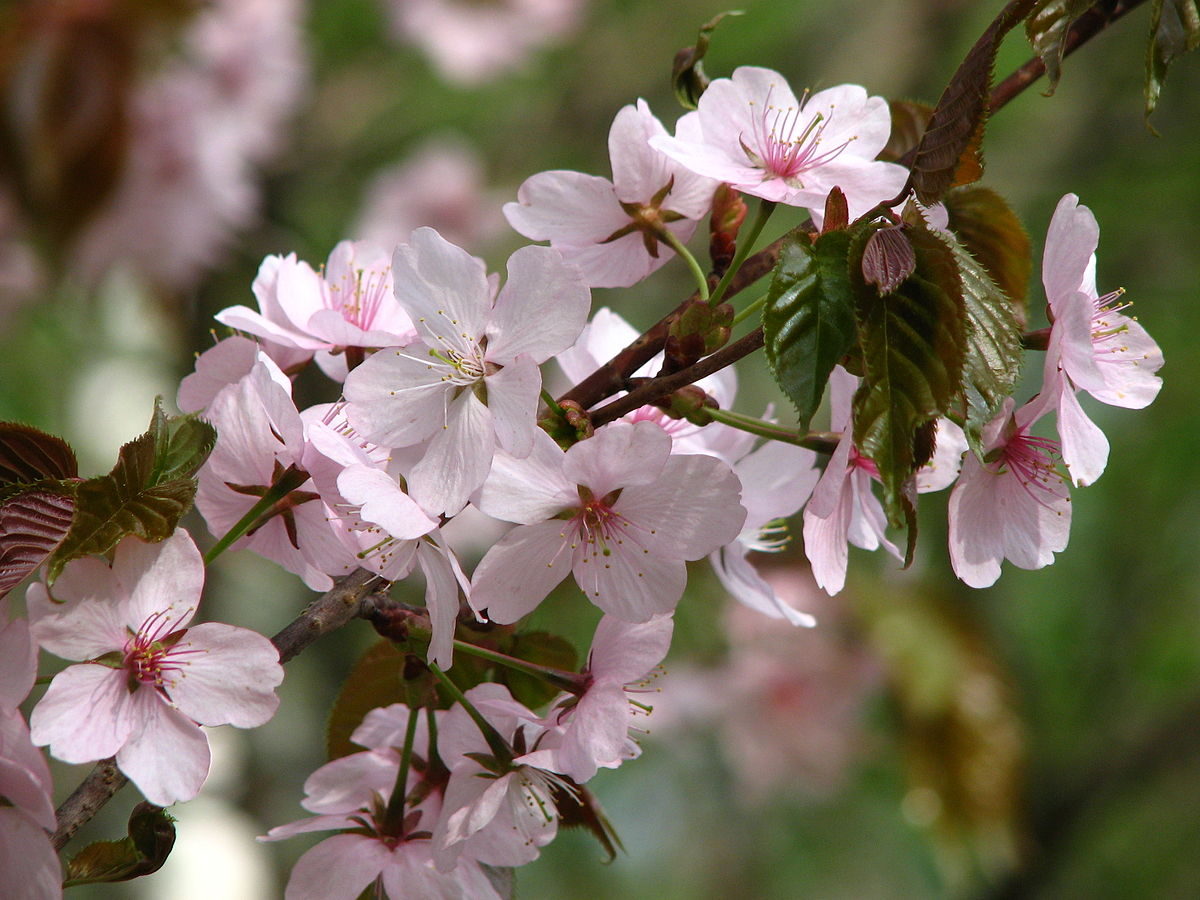

In [13]:
test = list(data_dir.glob('벚나무/*'))
PIL.Image.open(str(test[0]))

In [14]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9073 files belonging to 30 classes.
Using 7259 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9073 files belonging to 30 classes.
Using 1814 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['각시붓꽃', '국화', '꽃아까시나무', '꽃향유', '노루귀', '노루오줌', '단풍나무', '동백나무', '목련', '무궁화', '물봉선', '밤나무', '버드나무', '벚나무', '봉선화', '산딸나무', '소나무', '수국', '수선화', '은방울꽃', '은행나무', '작약', '진달래', '참나리', '측백나무', '층꽃나무', '토끼풀', '패랭이꽃', '할미꽃', '해바라기']


## 한글이 깨져서 안나와서 주피터에 글꼴 설치

In [17]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [18]:
!ls -l /usr/share/fonts/truetype/

total 4
drwxr-xr-x 2 root root 4096 Jun 14 14:21 nanum


In [19]:
!rm -rf ~/.cache/matplotlib/*

In [20]:
import matplotlib    
import matplotlib.font_manager

print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams["font.family"] = 'NanumGothic'

['DejaVu Serif', 'DejaVu Serif Display', 'STIXGeneral', 'STIXSizeTwoSym', 'cmb10', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Sans Display', 'STIXGeneral', 'STIXGeneral', 'DejaVu Serif', 'STIXSizeOneSym', 'STIXSizeFiveSym', 'DejaVu Sans', 'STIXSizeOneSym', 'cmex10', 'STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'cmmi10', 'cmss10', 'DejaVu Sans', 'STIXSizeThreeSym', 'cmtt10', 'STIXNonUnicode', 'cmsy10', 'DejaVu Sans', 'STIXSizeFourSym', 'cmr10', 'STIXNonUnicode', 'DejaVu Sans', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode', 'NanumGothic', 'NanumBarunGothic', 'NanumSquareRound', 'NanumMyeongjo', 'NanumSquare', 'NanumMyeongjo', 'NanumSquare', 'NanumSquareRound', 'NanumBarunGothic', 'NanumGothic']


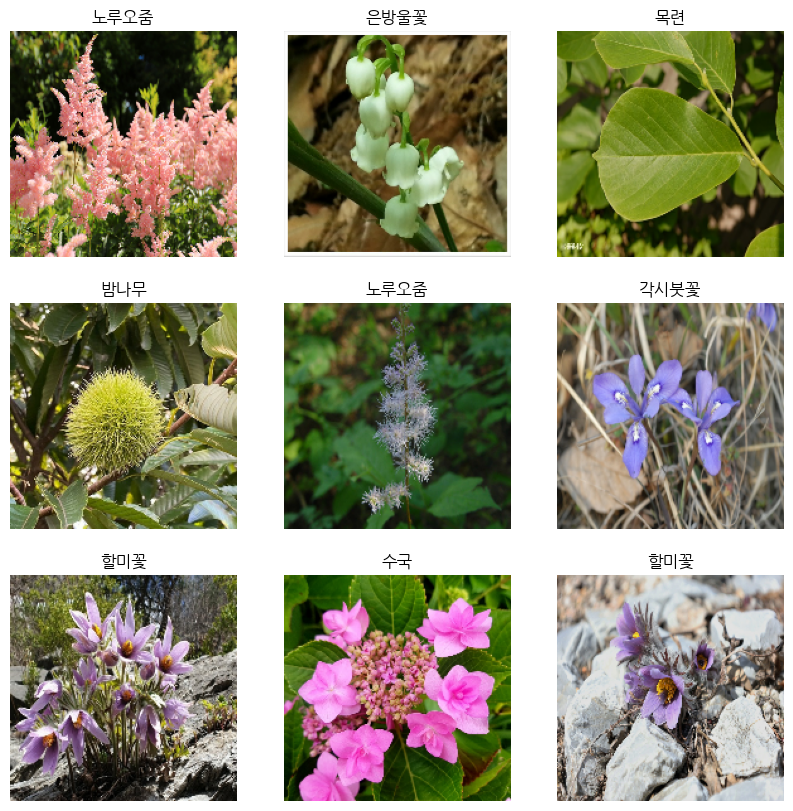

In [32]:
import matplotlib.pyplot as plt
# 왜 matplot 임포트가 안되는지 모르겠네요... 원래 잘됬는데 한글 글꼴 받는다고 좀 건드리다가 rc 관련한게 바뀐건지 임포트가 안됩니다..
# matplotlib만 pip로 지웠다 다시 까니까 제대로 되네요

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

# 데이터 표준화, 성능을 높이도록 데이터세트 구성

In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [25]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.03569404 0.8700056


# 1. CNN으로 임시 모델 테스트
- 데이터셋이 잘 되었는지 확인용으로 cnn 하나 가져와서 테스트했습니다.
- 데이터 증강 + 드롭아웃 적용
- 근데 왜 데이터 증강이 안돼죠??? 이미지가 똑같은데 ㅋㅋㅋㅋㅋ

In [54]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

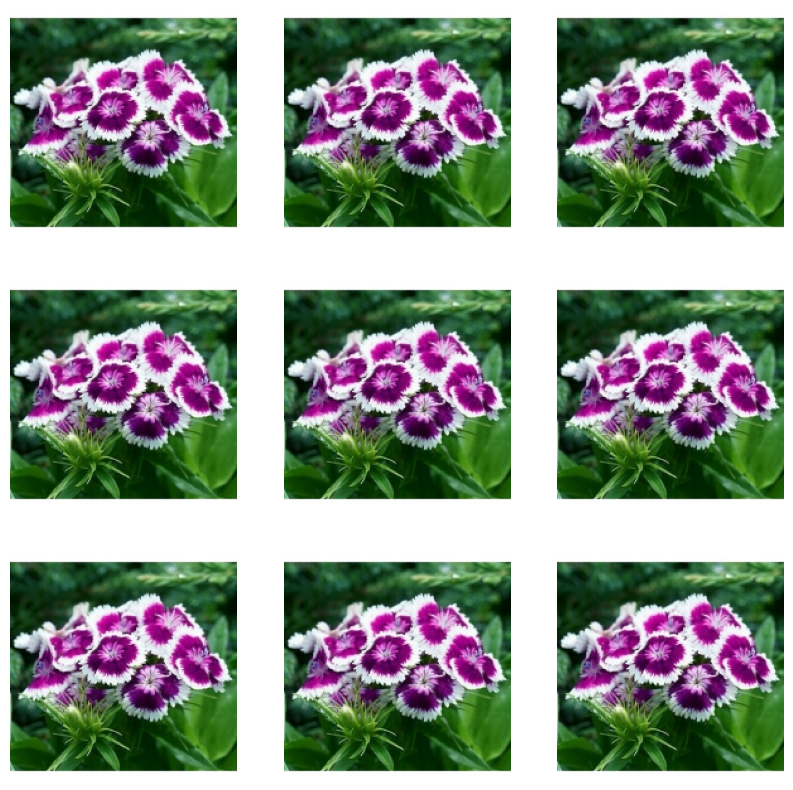

In [60]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")
    
plt.show()

In [45]:
num_classes = 30

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [49]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
227/227 [==============================] - 10s 39ms/step - loss: 2.7661 - accuracy: 0.2215 - val_loss: 2.2572 - val_accuracy: 0.3467
Epoch 2/10
227/227 [==============================] - 9s 39ms/step - loss: 2.0558 - accuracy: 0.3911 - val_loss: 1.8991 - val_accuracy: 0.4383
Epoch 3/10
227/227 [==============================] - 9s 39ms/step - loss: 1.8083 - accuracy: 0.4571 - val_loss: 1.7878 - val_accuracy: 0.4807
Epoch 4/10
227/227 [==============================] - 9s 38ms/step - loss: 1.6373 - accuracy: 0.5093 - val_loss: 1.6708 - val_accuracy: 0.5099
Epoch 5/10
227/227 [==============================] - 9s 38ms/step - loss: 1.5172 - accuracy: 0.5443 - val_loss: 1.6188 - val_accuracy: 0.5380
Epoch 6/10
227/227 [==============================] - 9s 38ms/step - loss: 1.4220 - accuracy: 0.5687 - val_loss: 1.5698 - val_accuracy: 0.5662
Epoch 7/10
227/227 [==============================] - 9s 38ms/step - loss: 1.3415 - accuracy: 0.5936 - val_loss: 1.6258 - val_accuracy: 0.546

### 과적합은 안일어나는데 정확도가 너무 낮네요...

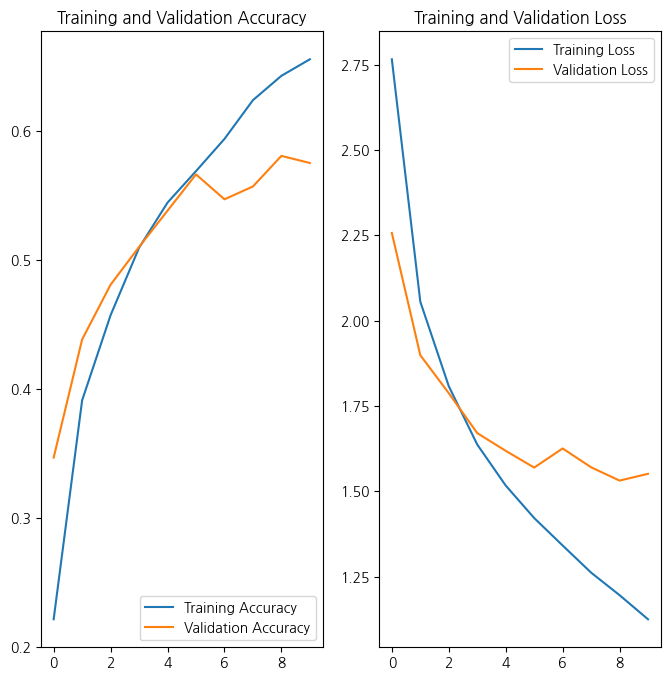

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(include_top=True, weights=None, pooling=max, classes=30)

epochs=10
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.8/dist-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "resnet50" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 180, 180, 3)
